In [1]:
# sympy está dando um aviso de código depreciado. Para fins de aprendizagem, estas linhas abaixo omitem os erros.
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# imports
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
import sympy

In [3]:
x = np.linspace(-5, 2, 100)
y1 = x ** 3 + 5 * x ** 2 + 10
y2 = 3 * x ** 2 + 10 * x
y3 = 6 * x + 10

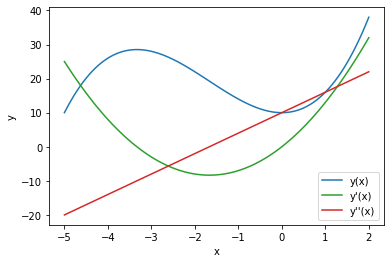

In [4]:
fig, ax = plt.subplots()
ax.plot(x, y1, color="tab:blue", label="y(x)")
ax.plot(x, y2, color="tab:green", label="y'(x)")
ax.plot(x, y3, color="tab:red", label="y''(x)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

In [5]:
x = np.linspace(-2, 2, 1000)
y1 = np.cos(40 * x)
y2 = np.exp(-x ** 2)

Text(0, 0.5, 'y')

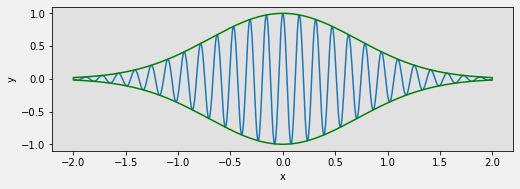

In [6]:
fig = plt.figure(figsize=(8, 2.5), facecolor="#f1f1f1")

# axes coordinates as fractions of the canvas width and height
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes((left, bottom, width, height), facecolor="#e1e1e1")

ax.plot(x, y1 * y2)
ax.plot(x, y2, "g")
ax.plot(x, -y2, "g")
ax.set_xlabel("x")
ax.set_ylabel("y")

In [7]:
fig.savefig("created_files/graph.png", dpi=100, facecolor="#f1f1f1")

### Axes and subplots

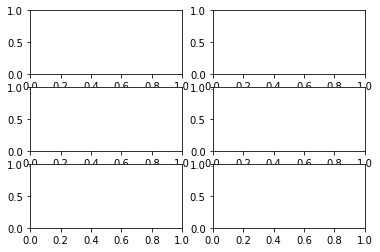

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=2)

### Plot types

#### Lines

In [9]:
x = np.linspace(-5, 5, 5)
y = np.ones_like(x) # create a np array filled with ones, with the same shape and size as x

In [10]:
def axes_settings(fig, ax, title, ymax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(0, ymax + 1)
    ax.set_title(title)

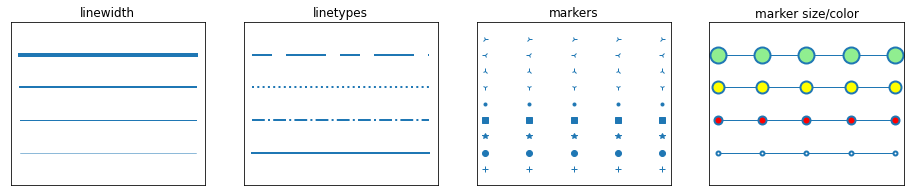

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(16, 3))

# Line width
linewidths = [0.5, 1.0, 2.0, 4.0]
for n, linewidth in enumerate(linewidths):
    axes[0].plot(x, y + n, color="tab:blue", linewidth=linewidth)
axes_settings(fig, axes[0], "linewidth", len(linewidths))

# Line style
linestyles = ["-", "-.", ":"]
for n, linestyle in enumerate(linestyles):
    axes[1].plot(x, y + n, color="tab:blue", lw=2, linestyle=linestyle)
# Custom dash style
line, = axes[1].plot(x, y + 3, color="tab:blue", lw=2)
length1, gap1, length2, gap2 = 10, 7, 20, 7
line.set_dashes([length1, gap1, length2, gap2])
axes_settings(fig, axes[1], "linetypes", len(linestyles) + 1)

# Marker type
markers = ["+", "o", "*", "s", ".", "1", "2", "3", "4"]
for n, marker in enumerate(markers):
    axes[2].plot(x, y + n, color="tab:blue", lw=2, ls=" ", marker=marker)
axes_settings(fig, axes[2], "markers", len(markers))

# Marker size and color
markersizecolors = [(4, "white"), (8, "red"), (12, "yellow"), (16, "lightgreen")]
for n, (markersize, markerfacecolor) in enumerate(markersizecolors):
    axes[3].plot(x, y + n, color="tab:blue", lw=1, ls="-", marker="o", markersize=markersize, markerfacecolor=markerfacecolor, markeredgewidth=2)
axes_settings(fig, axes[3], "marker size/color", len(markersizecolors))

### Line color variation

In [12]:
# A symbolic value of x, and a numerical array with specific values of x
sym_x = sympy.Symbol("x")
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)

def sin_expansion(x, n):
    """
    Evaluates the nth order Taylor series expansion of sin(x)
    for the numerical values in the array x
    """
    return sympy.lambdify(sym_x, sympy.sin(sym_x).series(n=n+1).removeO(), "numpy")(x)

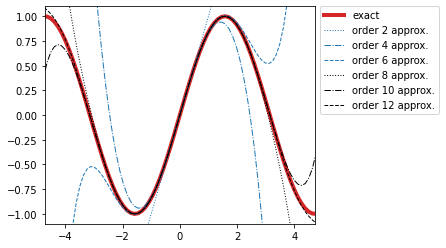

In [13]:
fig, ax = plt.subplots()

ax.plot(x, np.sin(x), linewidth=4, color="tab:red", label="exact")

colors = ["tab:blue", "black"]
linestyles = [":", "-.", "--"]

for idx, n in enumerate(range(1, 12, 2)):
    ax.plot(x, sin_expansion(x, n), color=colors[idx // 3],
    linestyle=linestyles[idx % 3], linewidth=1,
    label=f"order {n+1} approx.")
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(-1.5 * np.pi, 1.5 * np.pi)

# Place a legend outside of the axes -- cool to learn
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
# Making room for the legend to the right of the axes
fig.subplots_adjust(right=.75)

In [24]:
x = np.linspace(0, 1, 100)
y1 = x
y2 = x + x ** 2

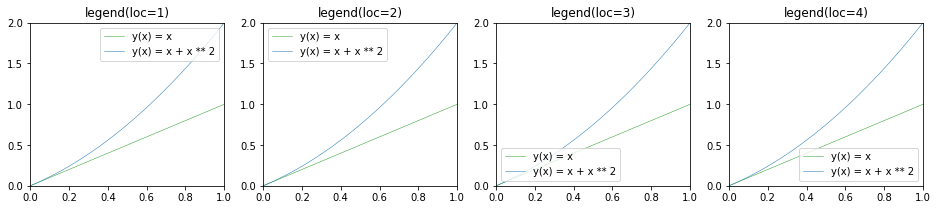

In [31]:
fig, axes = plt.subplots(1, 4, figsize=(16, 3))
locations = [1, 2, 3, 4]

for idx, ax in enumerate(fig.axes):
    ax.plot(x, y1, color="tab:green", lw=0.5, label="y(x) = x")
    ax.plot(x, y2, color="tab:blue", lw=0.5, label="y(x) = x + x ** 2")
    ax.set_title(f"legend(loc={locations[idx]})")
    ax.legend(loc=locations[idx])
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 2)
    ax.set_yticks(np.arange(0, 2.5, 0.5))

    

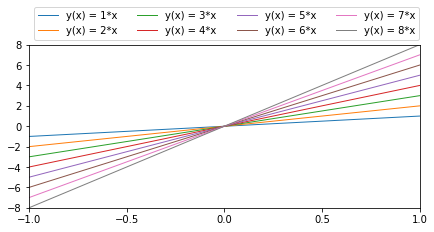

In [51]:
fig, ax = plt.subplots(figsize=(7, 3))

x = np.linspace(-1, 1, 100)
ys = [k*x for k in range(1, 9)]
for i, y in enumerate(ys):
    ax.plot(x, y, lw=1, label=f"y(x) = {i+1}*x")
ax.legend(ncol=4, loc=3, bbox_to_anchor=(0,1))
ax.set_xlim(-1, 1)
ax.set_ylim(-8, 8)
ax.set_xticks(np.arange(-1.0, 1.5, 0.5));

#### Continuar na página 153 - Text Formatting and Annotations